In [1]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
from deepxde.backend import tf
import matplotlib.animation as animation

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 0.026294 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [4.38e+01, 4.99e-03]    [4.95e+01, 4.99e-03]    [1.05e+00]    
Epoch 1: train loss improved from inf to 4.38e+01, saving model to model-1.weights.h5 ...

1000      [3.23e-04, 2.56e-07]    [4.33e-04, 2.56e-07]    [4.62e-04]    
Epoch 1000: train loss improved from 4.38e+01 to 3.23e-04, saving model to model-1000.weights.h5 ...

2000      [9.16e-05, 1.20e-08]    [1.80e-04, 1.20e-08]    [1.58e-04]    
Epoch 2000: train loss improved from 3.23e-04 to 9.16e-05, saving model to model-2000.weights.h5 ...

3000      [2.70e-05, 2.49e-09]    [8.40e-05, 2.49e-09]    [9.43e-05]    
Epoch 3000: train loss improved from 9.16e-05 to 2.70e-05, saving model to model-3000.weights.h5 ...

4000      [6.00e-04, 1.98e-05]    [5.12e-04, 1.98e-05]    [3.82e-03]    
5000      [2.66e-05, 6.09e-07]    [8.01e-05, 6.09e-07]    [6.34e-04]    
6000      [9.15e-06, 4.97e-

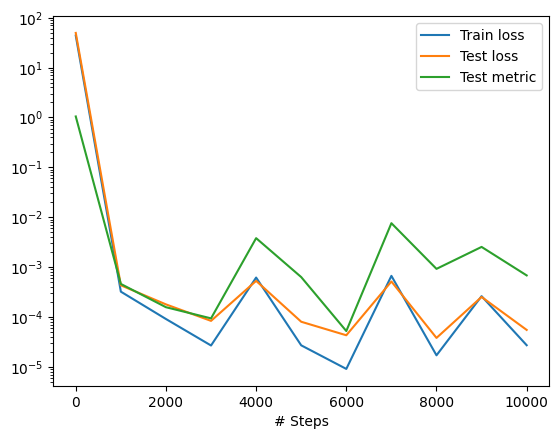

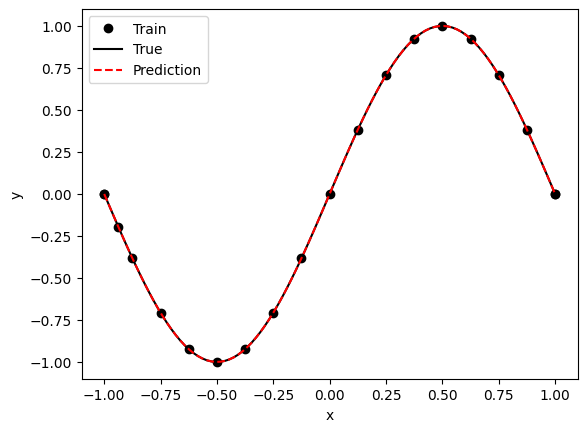

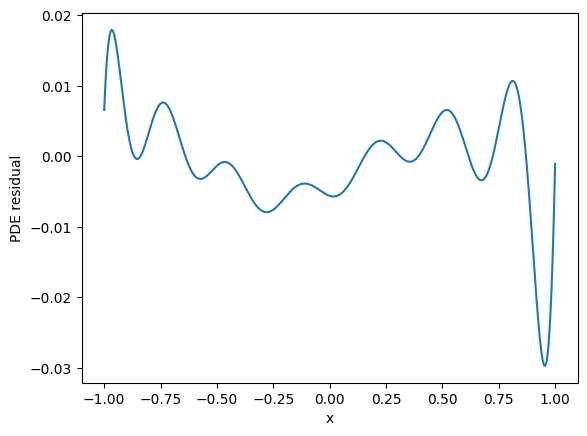

In [2]:
def pde(x, y):
    # Most backends
    dy_xx = dde.grad.hessian(y, x)
    # Backend jax
    # dy_xx, _ = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    # Use torch.sin for backend pytorch
    # return -dy_xx - np.pi ** 2 * torch.sin(np.pi * x)
    # Use jax.numpy.sin for backend jax
    # return -dy_xx - np.pi ** 2 * jnp.sin(np.pi * x)
    # Use paddle.sin for backend paddle
    # return -dy_xx - np.pi ** 2 * paddle.sin(np.pi * x)


def boundary(x, on_boundary):
    return on_boundary


def func(x):
    return np.sin(np.pi * x)


geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

checkpointer = dde.callbacks.ModelCheckpoint(
    "model", verbose=1, save_better_only=True
)
movie = dde.callbacks.MovieDumper(
    "movie", [-1], [1], period=100, save_spectrum=True, y_reference=func
)
losshistory, train_state = model.train(iterations=10000, callbacks=[checkpointer, movie])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Optional: Restore the saved model with the smallest training loss
# model.restore(f"model/model-{train_state.best_step}.ckpt", verbose=1)
# Plot PDE residual
x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()

In [22]:
def f(x):
    return tf.sin(5 * x[:, 0:1]) * tf.cos(5 * x[:, 1:2])

In [25]:
def func(x):
    return np.sin(5 * x[:, 0:1]) * np.cos(5 * x[:, 1:2]) / 50

In [26]:
def u_exact(x, y):
    return np.sin(5 * x) * np.cos(5 * y) / 50

In [24]:
def g(x):
    return np.sin(5 * x[:, 0:1]) * np.cos(5 * x[:, 1:2]) / 50

In [20]:
def boundary_condition(x, on_boundary):
    return on_boundary


def pde(x, u):
    u_xx = dde.grad.hessian(u, x, i=0, j=0)
    u_yy = dde.grad.hessian(u, x, i=1, j=1)
    return - (u_xx + u_yy) - f(x)

In [8]:
def compute_error_metrics(u_pred, u_exact_vals):
    l2_error = np.linalg.norm(u_pred - u_exact_vals) / np.linalg.norm(u_exact_vals)
    c_error = np.max(np.abs(u_pred - u_exact_vals))
    return l2_error, c_error


def compute_residual_norm(model, test_points):
    residuals = np.abs(model.predict(test_points, operator=pde))
    l2_residual = np.linalg.norm(residuals)
    c_residual = np.max(residuals)
    return l2_residual, c_residual

Compiling model...
'compile' took 0.003700 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [2.58e-01, 1.61e-01]    [2.56e-01, 1.61e-01]    [3.92e+01]    
Epoch 1: train loss improved from inf to 4.19e-01, saving model to model-1.weights.h5 ...

1000      [5.26e-02, 1.17e-03]    [5.70e-02, 1.17e-03]    [2.85e+00]    
Epoch 1000: train loss improved from 4.19e-01 to 5.37e-02, saving model to model-1000.weights.h5 ...

2000      [5.50e-03, 3.04e-04]    [4.39e-03, 3.04e-04]    [1.43e+00]    
Epoch 2000: train loss improved from 5.37e-02 to 5.81e-03, saving model to model-2000.weights.h5 ...

3000      [2.60e-03, 4.37e-04]    [1.80e-03, 4.37e-04]    [1.81e+00]    
Epoch 3000: train loss improved from 5.81e-03 to 3.04e-03, saving model to model-3000.weights.h5 ...

4000      [9.30e-04, 7.67e-05]    [5.86e-04, 7.67e-05]    [7.40e-01]    
Epoch 4000: train loss improved from 3.04e-03 to 1.01e-03, saving model to model-4000.weights.h5 ...

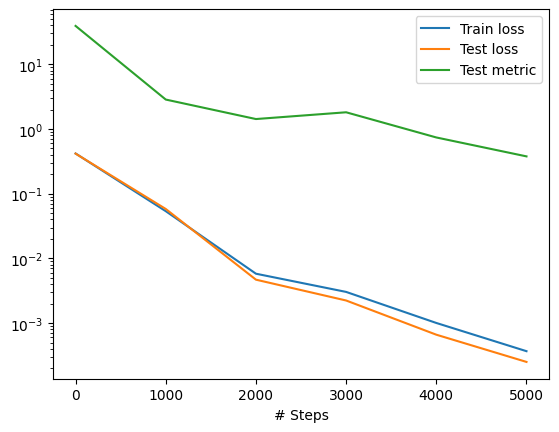

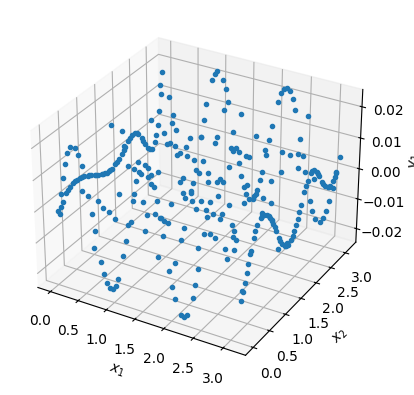

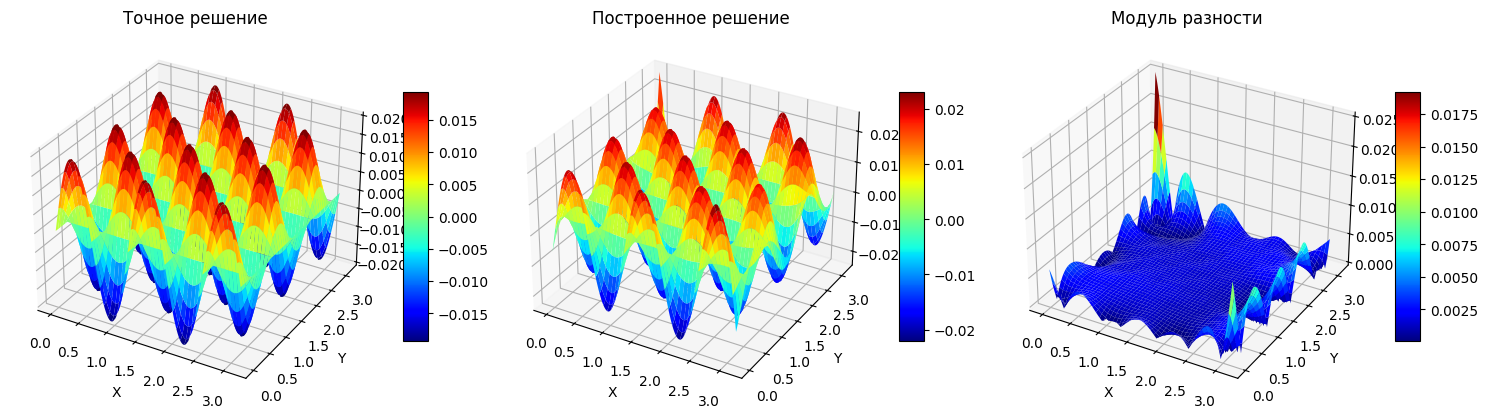

In [27]:
def poisson_pinn(N):
    geom = dde.geometry.Rectangle([0, 0], [np.pi, np.pi])
    bc = dde.DirichletBC(geom, g, boundary_condition)
    data = dde.data.PDE(geom, pde, [bc], num_domain=2000, num_boundary=200, solution=func, num_test=100)
    net = dde.nn.FNN([2] + [50] * 3 + [1], "tanh", "Glorot uniform")
    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])
    
    checkpointer = dde.callbacks.ModelCheckpoint(
        "model", verbose=1, save_better_only=True
    )
    losshistory, train_state = model.train(iterations=N, callbacks=[checkpointer])

    dde.saveplot(losshistory, train_state, issave=True, isplot=True)

    X_test, Y_test = np.meshgrid(np.linspace(0, np.pi, 1000), np.linspace(0, np.pi, 1000))
    X_test_flat = np.vstack([X_test.ravel(), Y_test.ravel()]).T

    u_pred = model.predict(X_test_flat).reshape(X_test.shape)

    u_exact_vals = u_exact(X_test, Y_test)
    
    fig = plt.figure(figsize=(15, 10))

    # 3D график для точного решения
    ax1 = fig.add_subplot(231, projection='3d')
    surf1 = ax1.plot_surface(X_test, Y_test, u_exact_vals, cmap="jet")
    fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)
    ax1.set_title("Точное решение")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('u_exact')

    # 3D график для построенного решения
    ax2 = fig.add_subplot(232, projection='3d')
    surf2 = ax2.plot_surface(X_test, Y_test, u_pred, cmap="jet")
    fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)
    ax2.set_title("Построенное решение")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('u_pred')

    # 3D график для модуля разности
    ax3 = fig.add_subplot(233, projection='3d')
    surf3 = ax3.plot_surface(X_test, Y_test, np.abs(u_pred - u_exact_vals), cmap="jet")
    fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=10)
    ax3.set_title("Модуль разности")
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('|u_pred - u_exact|')

    plt.tight_layout()
    plt.show()
    
    '''fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    cs1 = axs[0, 0].contourf(X_test, Y_test, u_exact_vals, cmap="jet")
    axs[0, 0].set_aspect('equal')
    fig.colorbar(cs1, ax=axs[0, 0])
    axs[0, 0].set_title("Точное решение")
    
    cs2 = axs[0, 1].contourf(X_test, Y_test, u_pred, cmap="jet")
    fig.colorbar(cs2, ax=axs[0, 1])
    axs[0, 1].set_aspect('equal')
    axs[0, 1].set_title("Построенное решение")
    
    cs3 = axs[0, 2].contourf(X_test, Y_test, np.abs(u_pred - u_exact_vals), cmap="jet")
    fig.colorbar(cs3, ax=axs[0, 2])
    axs[0, 2].set_aspect('equal')
    axs[0, 2].set_title("Модуль разности")
    
    x_slice = np.linspace(0, np.pi, 100)
    y_values = [0.01, np.pi / 2, np.pi - 0.01]
    y_values_names = ['0.01', '$\\frac{\pi}{2}$', '$\pi - 0.01$']
    
    for i, y in enumerate(y_values):
        xy_slice = np.vstack([x_slice, y * np.ones_like(x_slice)]).T
        u_exact_slice = u_exact(x_slice, y)
        u_pred_slice = model.predict(xy_slice)
        axs[1, i].set_aspect('auto')
        axs[1, i].plot(x_slice, u_exact_slice, label="Exact", linestyle="--")
        axs[1, i].plot(x_slice, u_pred_slice, label="PINN")
        axs[1, i].legend()
        axs[1, i].set_title("Срез x при y=" + y_values_names[i])
    
    plt.show()'''
    
    return

poisson_pinn(5000)

Compiling model...
'compile' took 0.003787 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [1.79e-01, 1.61e-01]    [2.25e-01, 1.61e-01]    [2.22e+00]    
Epoch 1: train loss improved from inf to 3.40e-01, saving model to model-1.weights.h5 ...

1000      [2.50e-04, 1.32e-04]    [1.22e-04, 1.32e-04]    [6.16e-02]    
Epoch 1000: train loss improved from 3.40e-01 to 3.82e-04, saving model to model-1000.weights.h5 ...

2000      [3.47e-05, 2.80e-05]    [2.13e-05, 2.80e-05]    [3.32e-02]    
Epoch 2000: train loss improved from 3.82e-04 to 6.27e-05, saving model to model-2000.weights.h5 ...

3000      [1.55e-05, 2.28e-05]    [1.18e-05, 2.28e-05]    [2.90e-02]    
Epoch 3000: train loss improved from 6.27e-05 to 3.83e-05, saving model to model-3000.weights.h5 ...

4000      [8.26e-06, 3.16e-06]    [6.08e-06, 3.16e-06]    [9.37e-03]    
Epoch 4000: train loss improved from 3.83e-05 to 1.14e-05, saving model to model-4000.weights.h5 ...

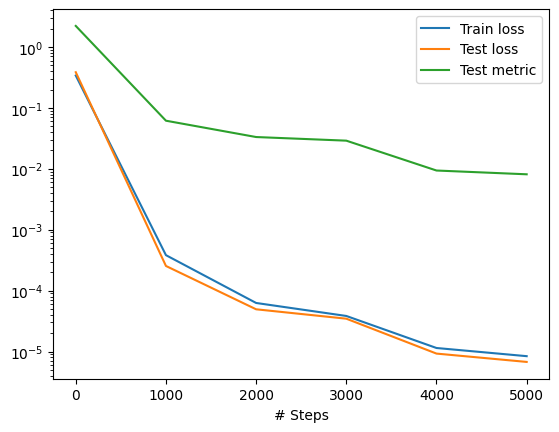

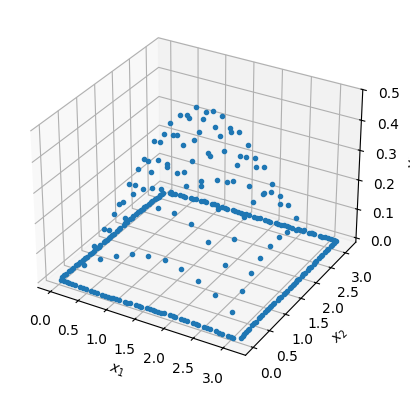

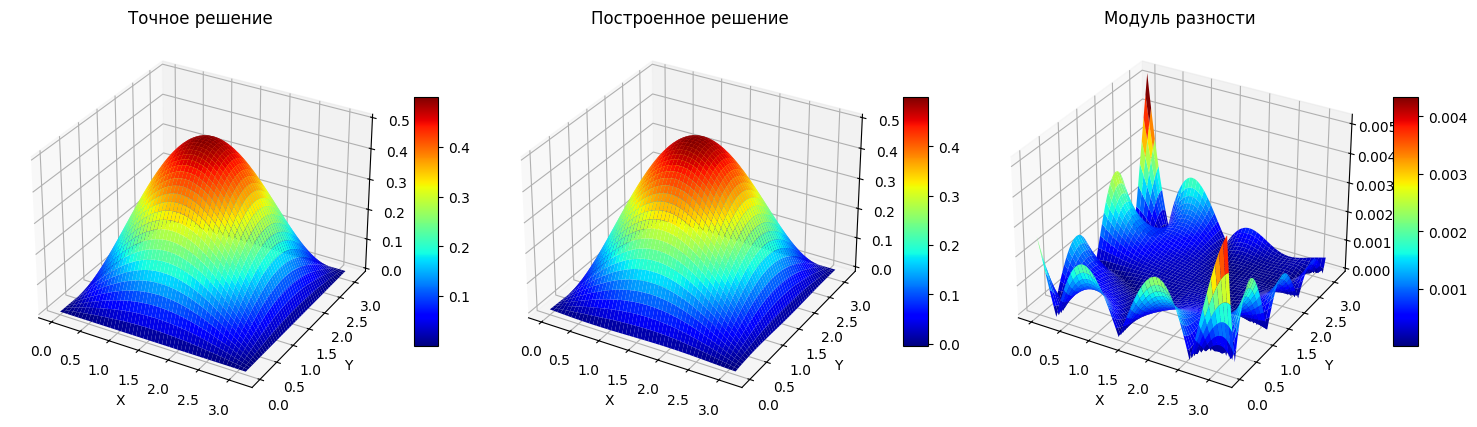

In [13]:
def poisson_pinn(N):
    geom = dde.geometry.Rectangle([0, 0], [np.pi, np.pi])
    bc = dde.DirichletBC(geom, g, boundary_condition)
    data = dde.data.PDE(geom, pde, [bc], num_domain=5000, num_boundary=200, solution=func, num_test=100)
    net = dde.nn.FNN([2] + [50] * 3 + [1], "tanh", "Glorot uniform")
    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])
    
    checkpointer = dde.callbacks.ModelCheckpoint(
        "model", verbose=1, save_better_only=True
    )
    losshistory, train_state = model.train(iterations=N, callbacks=[checkpointer])

    dde.saveplot(losshistory, train_state, issave=True, isplot=True)

    X_test, Y_test = np.meshgrid(np.linspace(0, np.pi, 1000), np.linspace(0, np.pi, 1000))
    X_test_flat = np.vstack([X_test.ravel(), Y_test.ravel()]).T

    u_pred = model.predict(X_test_flat).reshape(X_test.shape)

    u_exact_vals = u_exact(X_test, Y_test)
    
    fig = plt.figure(figsize=(15, 10))

    # 3D график для точного решения
    ax1 = fig.add_subplot(231, projection='3d')
    surf1 = ax1.plot_surface(X_test, Y_test, u_exact_vals, cmap="jet")
    fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)
    ax1.set_title("Точное решение")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('u_exact')

    # 3D график для построенного решения
    ax2 = fig.add_subplot(232, projection='3d')
    surf2 = ax2.plot_surface(X_test, Y_test, u_pred, cmap="jet")
    fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)
    ax2.set_title("Построенное решение")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('u_pred')

    # 3D график для модуля разности
    ax3 = fig.add_subplot(233, projection='3d')
    surf3 = ax3.plot_surface(X_test, Y_test, np.abs(u_pred - u_exact_vals), cmap="jet")
    fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=10)
    ax3.set_title("Модуль разности")
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('|u_pred - u_exact|')

    plt.tight_layout()
    plt.show()
    
    '''fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    cs1 = axs[0, 0].contourf(X_test, Y_test, u_exact_vals, cmap="jet")
    axs[0, 0].set_aspect('equal')
    fig.colorbar(cs1, ax=axs[0, 0])
    axs[0, 0].set_title("Точное решение")
    
    cs2 = axs[0, 1].contourf(X_test, Y_test, u_pred, cmap="jet")
    fig.colorbar(cs2, ax=axs[0, 1])
    axs[0, 1].set_aspect('equal')
    axs[0, 1].set_title("Построенное решение")
    
    cs3 = axs[0, 2].contourf(X_test, Y_test, np.abs(u_pred - u_exact_vals), cmap="jet")
    fig.colorbar(cs3, ax=axs[0, 2])
    axs[0, 2].set_aspect('equal')
    axs[0, 2].set_title("Модуль разности")
    
    x_slice = np.linspace(0, np.pi, 100)
    y_values = [0.01, np.pi / 2, np.pi - 0.01]
    y_values_names = ['0.01', '$\\frac{\pi}{2}$', '$\pi - 0.01$']
    
    for i, y in enumerate(y_values):
        xy_slice = np.vstack([x_slice, y * np.ones_like(x_slice)]).T
        u_exact_slice = u_exact(x_slice, y)
        u_pred_slice = model.predict(xy_slice)
        axs[1, i].set_aspect('auto')
        axs[1, i].plot(x_slice, u_exact_slice, label="Exact", linestyle="--")
        axs[1, i].plot(x_slice, u_pred_slice, label="PINN")
        axs[1, i].legend()
        axs[1, i].set_title("Срез x при y=" + y_values_names[i])
    
    plt.show()'''
    
    return

poisson_pinn(5000)

In [12]:
def poisson_pinn(N):
    geom = dde.geometry.Rectangle([0, 0], [np.pi, np.pi])
    bc = dde.DirichletBC(geom, g, boundary_condition)
    data = dde.data.PDE(geom, pde, [bc], num_domain=1000, num_boundary=100, solution=func, num_test=100)
    net = dde.nn.FNN([2] + [50] * 3 + [1], "tanh", "Glorot uniform")
    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])
    
    u_pred_list = []
    for i in range(0, N+1, 500):
        model.train(iterations=i, display_every=500)
        X_test, Y_test = np.meshgrid(np.linspace(0, np.pi, 100), np.linspace(0, np.pi, 100))
        X_test_flat = np.vstack([X_test.ravel(), Y_test.ravel()]).T
        u_pred = model.predict(X_test_flat).reshape(X_test.shape)
        u_pred_list.append(u_pred)
    
    u_exact_vals = u_exact(X_test, Y_test)
    
    l2_error, c_error = compute_error_metrics(u_pred, u_exact_vals)
    l2_residual, c_residual = compute_residual_norm(model, X_test_flat)
    
    print(f"L2 error: {l2_error}, C error: {c_error}")
    print(f"L2 residual norm: {l2_residual}, C residual norm: {c_residual}")
    
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    cs1 = axs[0, 0].contourf(X_test, Y_test, u_exact_vals, cmap="jet")
    axs[0, 0].set_aspect('equal')
    fig.colorbar(cs1, ax=axs[0, 0])
    axs[0, 0].set_title("Точное решение")
    
    cs2 = axs[0, 1].contourf(X_test, Y_test, u_pred, cmap="jet")
    fig.colorbar(cs2, ax=axs[0, 1])
    axs[0, 1].set_aspect('equal')
    axs[0, 1].set_title("Построенное решение")
    
    cs3 = axs[0, 2].contourf(X_test, Y_test, np.abs(u_pred - u_exact_vals), cmap="jet")
    fig.colorbar(cs3, ax=axs[0, 2])
    axs[0, 2].set_aspect('equal')
    axs[0, 2].set_title("Модуль разности")
    
    x_slice = np.linspace(0, np.pi, 100)
    y_values = [0.01, np.pi / 2, np.pi - 0.01]
    y_values_names = ['0.01', '$\\frac{\pi}{2}$', '$\pi - 0.01$']
    
    for i, y in enumerate(y_values):
        xy_slice = np.vstack([x_slice, y * np.ones_like(x_slice)]).T
        u_exact_slice = u_exact(x_slice, y)
        u_pred_slice = model.predict(xy_slice)
        axs[1, i].set_aspect('equal')
        axs[1, i].plot(x_slice, u_exact_slice, label="Exact", linestyle="--")
        axs[1, i].plot(x_slice, u_pred_slice, label="PINN")
        axs[1, i].legend()
        axs[1, i].set_title("Срез x при y=" + y_values_names[i])
    
    plt.show()
    
    fig_anim, ax_anim = plt.subplots()
    def update_anim(frame):
        ax_anim.clear()
        cs = ax_anim.contourf(X_test, Y_test, u_pred_list[frame], cmap="jet")
        return cs.collections
    
    ani = animation.FuncAnimation(fig_anim, update_anim, frames=len(u_pred_list), interval=200)
    ani.save("pinn_solution_evolution.gif", writer="ffmpeg")
    
    return l2_error, c_error, l2_residual, c_residual

poisson_pinn(5000)

Compiling model...
'compile' took 0.002803 s

Training model...

0         [1.33e-01, 2.89e-01]    [1.72e-01, 2.89e-01]    [2.32e+00]    

Best model at step 0:
  train loss: 4.22e-01
  test loss: 4.61e-01
  test metric: [2.32e+00]

'train' took 0.437227 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [1.33e-01, 2.89e-01]    [1.72e-01, 2.89e-01]    [2.32e+00]    
500       [4.07e-03, 2.73e-03]    [2.76e-03, 2.73e-03]    [2.02e-01]    

Best model at step 500:
  train loss: 6.80e-03
  test loss: 5.49e-03
  test metric: [2.02e-01]

'train' took 2.278452 s

Training model...

Step      Train loss              Test loss               Test metric   
500       [4.07e-03, 2.73e-03]    [2.76e-03, 2.73e-03]    [2.02e-01]    


KeyboardInterrupt: 